In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import nbformat
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='petal_length'>

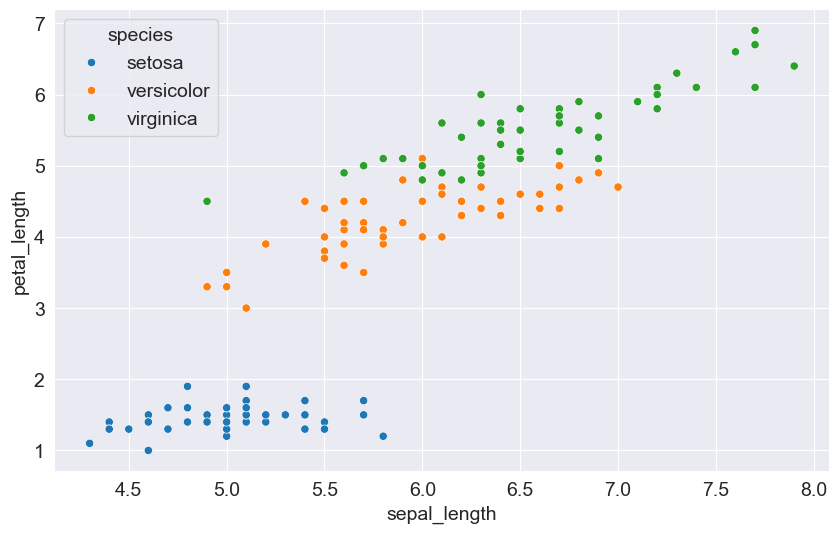

In [4]:
sns.scatterplot(data = iris_df,
                x = 'sepal_length',
                y = 'petal_length',
                hue = 'species')

In [5]:
numeric_cols = iris_df.select_dtypes(include = np.number).columns.tolist()

In [6]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [7]:
X = iris_df[numeric_cols]

K-means clustering:
This algorithm classifies objects into pre-determined number of cluster by finding optimal central point(cantroids) for each cluster. Each object is classified as belonging the cluster represented by closest centroid.